# ASSIGNMENT 5
<hr style="border: solid black"> </hr>
Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import math
import scipy.stats as stats

sns.set(style = 'darkgrid')
pd.set_option('display.float_format', '{:.2f}'.format)

<hr style="border:1px solid black"> </hr>
<hr style="border:1px solid black"> </hr>


# 1. A &nbsp; <span style="font-variant:small-caps;">Preliminaries</span>

Reading The Dataset

In [2]:
df = pd.read_csv('master.csv')

<hr style="border:1px solid lightgrey"> </hr>

A Portion of the Data

In [3]:
display(df.head(10))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


<hr style="border:1px solid lightgrey"> </hr>
Number of Records and Variables

In [4]:
r, c = df.shape
print("The number of Records are", r)
print("The number of Variables are", c)

The number of Records are 27820
The number of Variables are 12


<hr style="border:1px solid lightgrey"> </hr>
Data Type, the Number of Unique Values, Variable Type and Number of Missing Terms for each Variable

In [5]:
# The different fields we have to find.
keys = [" Variable ", " Data Type ", " No. of Unique Values ", " Variable Type ", " No. of Missing Terms "]

# Creating an empty Dictionary to store the data.
data = {}

# Setting the fields from the list we created earlier as the keys of the data dictionary and initialising its
# values to an empty list. 
for col in keys:
  data[col] = []

for col in df:
  data[" Variable "].append(col)
  data[" Data Type "].append(df.dtypes[col])
  data[" No. of Unique Values "].append(df[col].nunique())
  data[" No. of Missing Terms "].append(df[col].isnull().sum())

# Setting the variable type depending on the variable.
data[" Variable Type "] = ['nominal', 'integer', 'nominal', 'ordinal', 'integer', 'integer', 'continuous',
                           'temporal', 'continuous', 'continuous', 'continuous', 'ordinal']

# Finally converting to a dataframe for better representation
DataDf = pd.DataFrame(data, columns = keys)
display(DataDf)

,Variable,Data Type,No. of Unique Values,Variable Type,No. of Missing Terms
0,country,object,101,nominal,0
1,year,int64,32,integer,0
2,sex,object,2,nominal,0
3,age,object,6,ordinal,0
4,suicides_no,int64,2084,integer,0
5,population,int64,25564,integer,0
6,suicides/100k pop,float64,5298,continuous,0
7,country-year,object,2321,temporal,0
8,HDI for year,float64,305,continuous,19456
9,gdp_for_year ($),object,2321,continuous,0


<hr style="border:1px solid lightgrey"> </hr>
Number of Records with No Missing Terms

In [6]:
count = 0
for col in df:
  if df[col].isnull().sum() == 0:
    count += 1
print("The number of records with no missing data are", count)

The number of records with no missing data are 11


<hr style="border:1px solid black"> </hr>
<hr style="border:1px solid black"> </hr>

# 1. B &nbsp; <span style="font-variant:small-caps;">Discrete Variables</span>

The Variables which are Discrete

In [7]:
DiscreteVars = ['year', 'suicides_no', 'population']

<hr style="border:1px solid lightgrey"> </hr>
Histograms of Discrete Variables

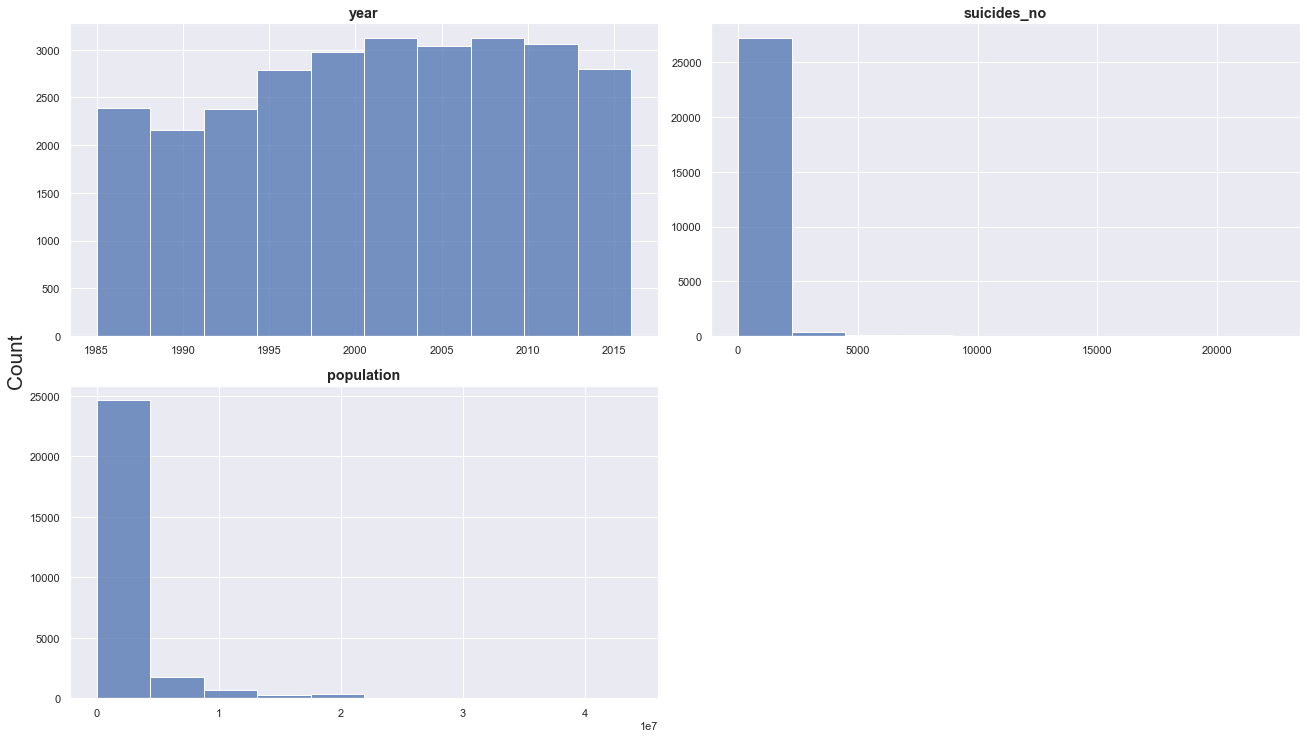

In [8]:
f = plt.figure(figsize=(18,15))

for i in range(3):
  f.add_subplot(3,2, i+1)
  ax = sns.histplot(df[DiscreteVars[i]], bins = 10)
  ax.set(xlabel = '', ylabel = '')
  plt.title(DiscreteVars[i],weight='bold', size = 'large')

f.text(0, 0.66, "Count", ha = "center", va = "center", rotation = 90, size = 'xx-large',)
plt.tight_layout()
plt.show()

<hr style="border:1px solid lightgrey"> </hr>
Mode of Discrete Variables

In [9]:
for i in range(3):
  modelist = df.mode(axis = 0, numeric_only = True)[DiscreteVars[i]].values.tolist()
  finalmodes = [x for x in modelist if x == x]
  print(DiscreteVars[i], finalmodes)

year [2009.0]
suicides_no [0.0]
population [24000.0]


The mode for Discrete Variable **Year** is 20009.\
The mode for Discrete Variable **Suicides Number** is 0.\
The mode for Discrete Variable **Population** is 24000.

<hr style="border:1px solid lightgrey"> </hr>
Entropy of Discrete Variables

In [10]:
for i in range(3):
  print(DiscreteVars[i], stats.entropy(df[DiscreteVars[i]]))

year 10.233501509383203
suicides_no 8.441224052875892
population 9.086968976099499


The entropy for Discrete Variable **Year** is 10.23.\
The entropy for Discrete Variable **Suicides Number** is 8.44.\
The entropy for Discrete Variable **Population** is 9.09.

<hr style="border:1px solid black"> </hr>
<hr style="border:1px solid black"> </hr>

# 1. C &nbsp; <span style="font-variant:small-caps;">Continuous Variables</span>

The Variables which are Continuous

In [11]:
ContinuousVars = ['suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']

<hr style="border:1px solid lightgrey"> </hr>

Converting **gdp_for_year** variable to integer type 

In [12]:
# Replace ',' in the amount by '' empty space
df[' gdp_for_year ($) '].replace(',','', regex=True, inplace=True)
# Converting the data type of the variable to numeric type
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].apply(pd.to_numeric)

<hr style="border:1px solid lightgrey"> </hr>
The Mean, Variance, Skew, Minimum, Maximum, Median, 25th and 75th Percentile and Inter-Quartile Range for each Variable

In [13]:
# The different fields we have to find.
keys = ['Variable', 'Mean', 'Variance', 'Skew', 'Minimum', 'Maximum', 'Median', '25th Percentile', '75th Percentile', 'Inter-Quartile Range']

# Creating an empty Dictionary to store the data.
data = {}

# Setting the fields from the list we created earlier as the keys of the data dictionary and initialising its values to an empty list. 
for col in keys:
  data[col] = []

for i, col in enumerate(ContinuousVars):
  data['Variable'].append(col)
  data['Mean'].append((df.mean()[col]))
  data['Variance'].append(df.var()[col])
  data['Skew'].append(df.skew()[col])
  data['Minimum'].append(df.min()[col])
  data['Maximum'].append(df.max()[col])
  data['Median'].append(df.median()[col])
  data['25th Percentile'].append(df.quantile(q = 0.25)[col])
  data['75th Percentile'].append(df.quantile(q = 0.75)[col])
  data['Inter-Quartile Range'].append(data['75th Percentile'][i] - data['25th Percentile'][i])

# Finally converting to a dataframe for better representation
DataDf = pd.DataFrame(data, columns = keys)
display(DataDf)

,Variable,Mean,Variance,Skew,Minimum,Maximum,Median,25th Percentile,75th Percentile,Inter-Quartile Range
0,suicides/100k pop,12.82,359.54,2.96,0.00,224.97,5.99,0.92,16.62,15.70
1,HDI for year,0.78,0.01,-0.30,0.48,0.94,0.78,0.71,0.85,0.14
2,gdp_for_year ($),445580969025.73,2112981991227138966028288.00,7.23,46919625.00,18120714000000.00,48114688201.00,8985352832.00,260202429150.00,251217076318.00
3,gdp_per_capita ($),16866.46,356740544.99,1.96,251.00,126352.00,9372.00,3447.00,24874.00,21427.00


<hr style="border:1px solid lightgrey"> </hr>
Box-and-Whiskers Plot for each Continuous Variable

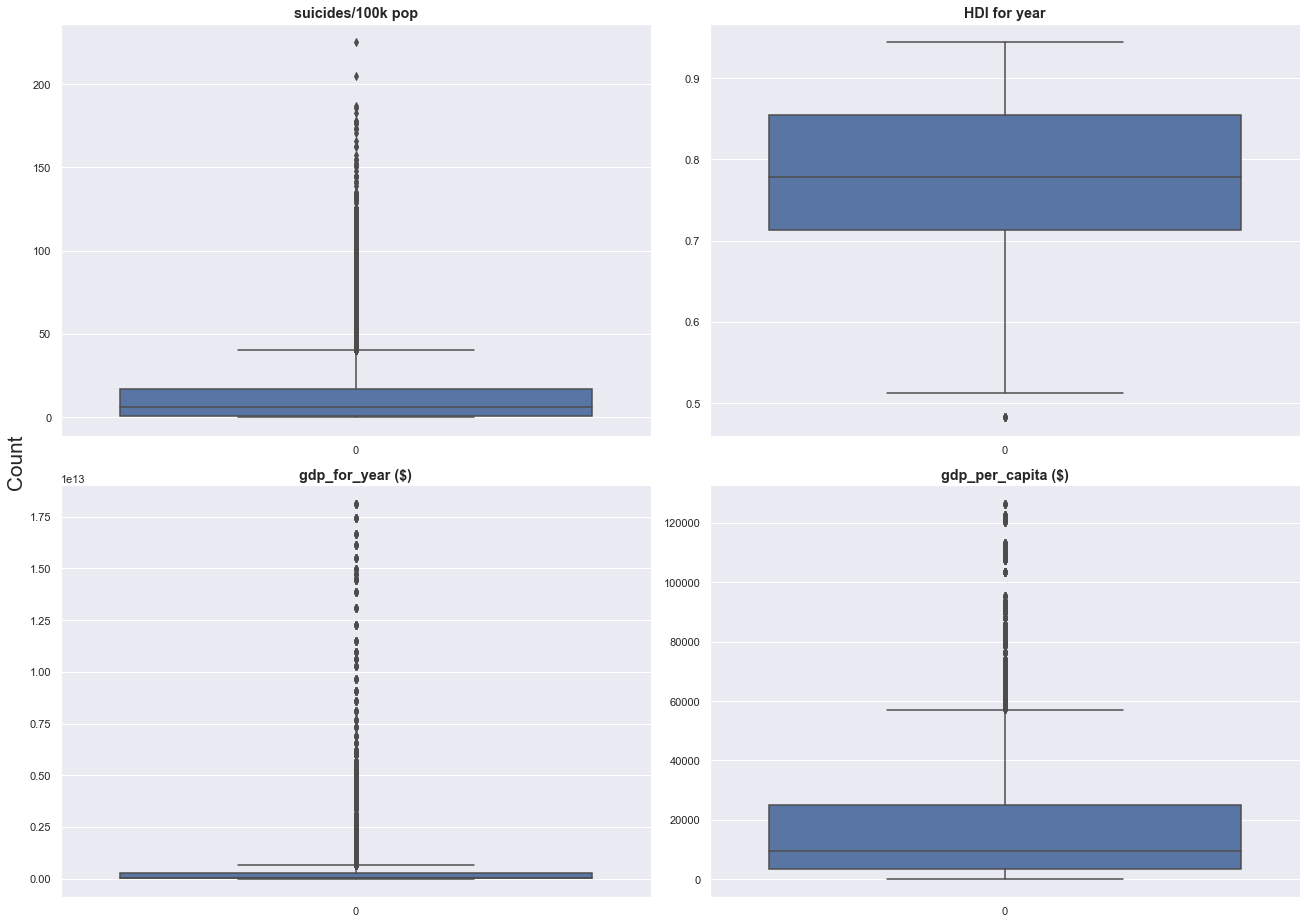

In [14]:
f = plt.figure(figsize = (18,13))

for i in range(4):
  f.add_subplot(2, 2, i+1)
  ax = sns.boxplot(data = df[ContinuousVars[i]])
  ax.set(xlabel = '', ylabel = '')
  plt.title(ContinuousVars[i],weight='bold', size = 'large')

f.text(0, 0.5, "Count", ha = "center", va = "center", rotation = 90, size = 'xx-large',)
plt.tight_layout()
plt.show()

<hr style="border:1px solid lightgrey"> </hr>

### Histograms
*Too few bins ( = 3)*

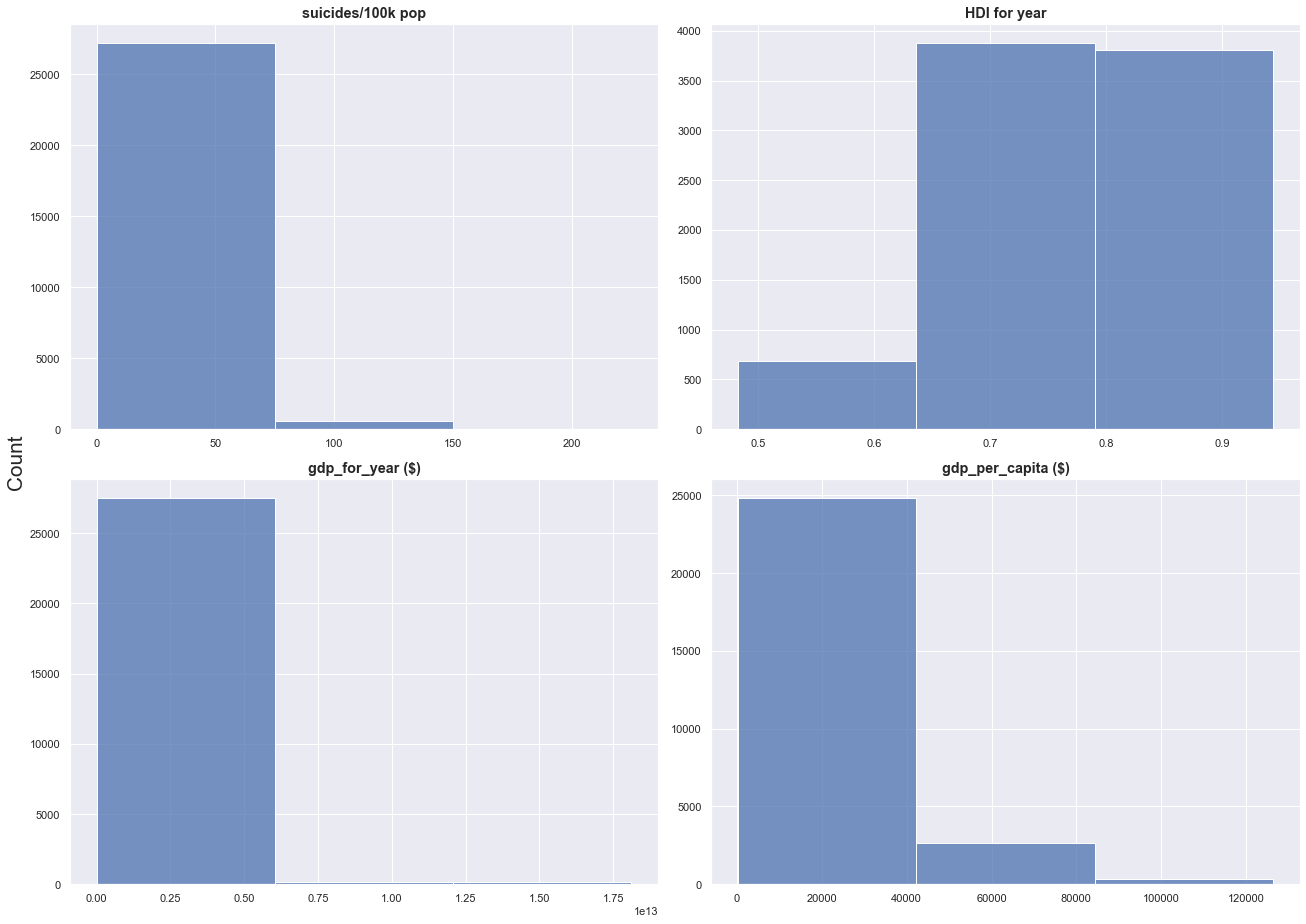

In [15]:
f = plt.figure(figsize = (18,13))

for i in range(4):
  f.add_subplot(2, 2, i+1)
  ax = sns.histplot(df[ContinuousVars[i]], bins = 3)
  ax.set(xlabel = '', ylabel = '')
  plt.title(ContinuousVars[i],weight='bold', size = 'large')

f.text(0, 0.5, "Count", ha = "center", va = "center", rotation = 90, size = 'xx-large',)
plt.tight_layout()
plt.show()

---
*Too many bins ( = 30)*

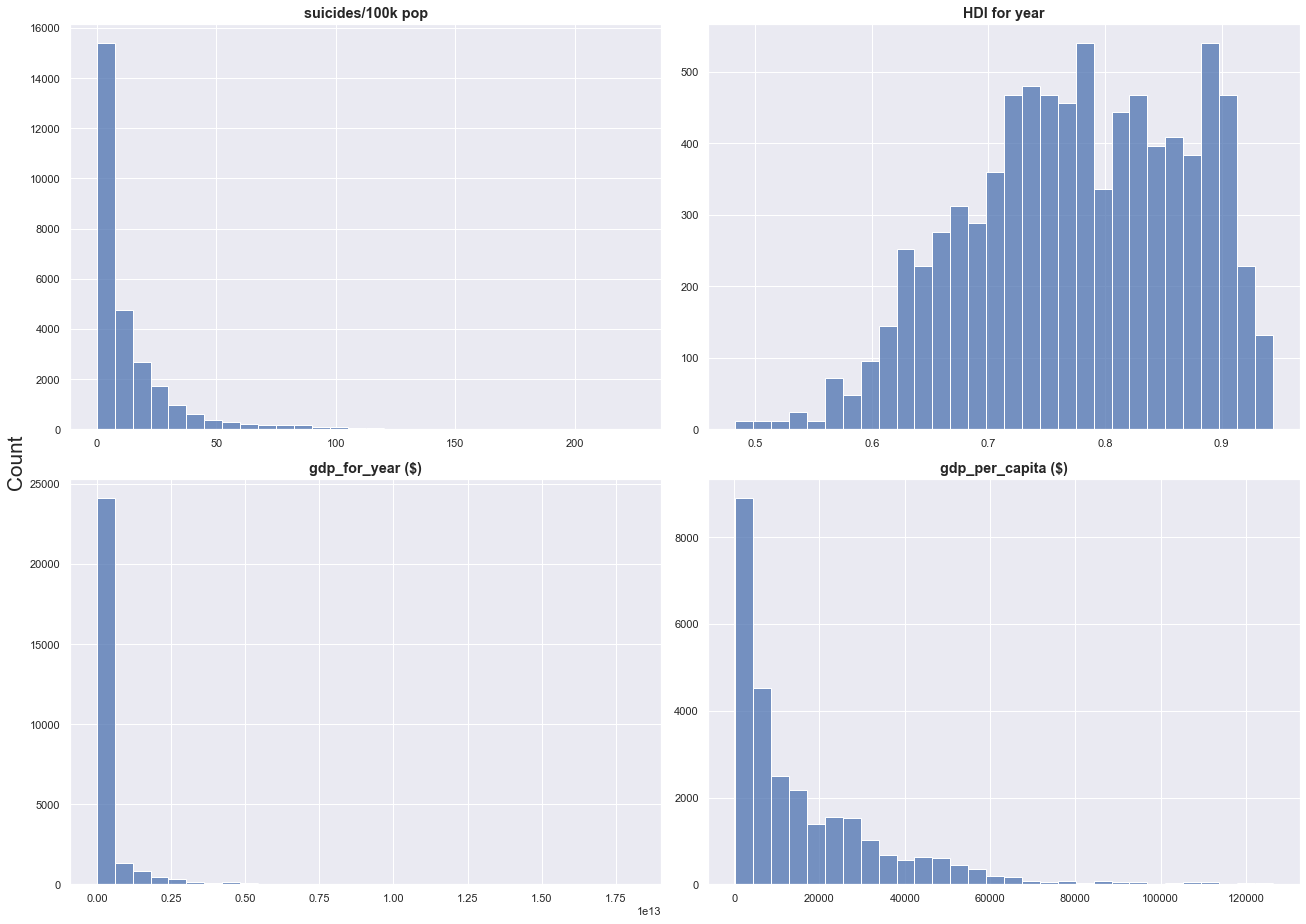

In [16]:
f = plt.figure(figsize = (18,13))

for i in range(4):
  f.add_subplot(2, 2, i+1)
  ax = sns.histplot(df[ContinuousVars[i]], bins = 30)
  ax.set(xlabel = '', ylabel = '')
  plt.title(ContinuousVars[i],weight='bold', size = 'large')

f.text(0, 0.5, "Count", ha = "center", va = "center", rotation = 90, size = 'xx-large',)
plt.tight_layout()
plt.show()

---
*Good Number of Bins ( = 10)*

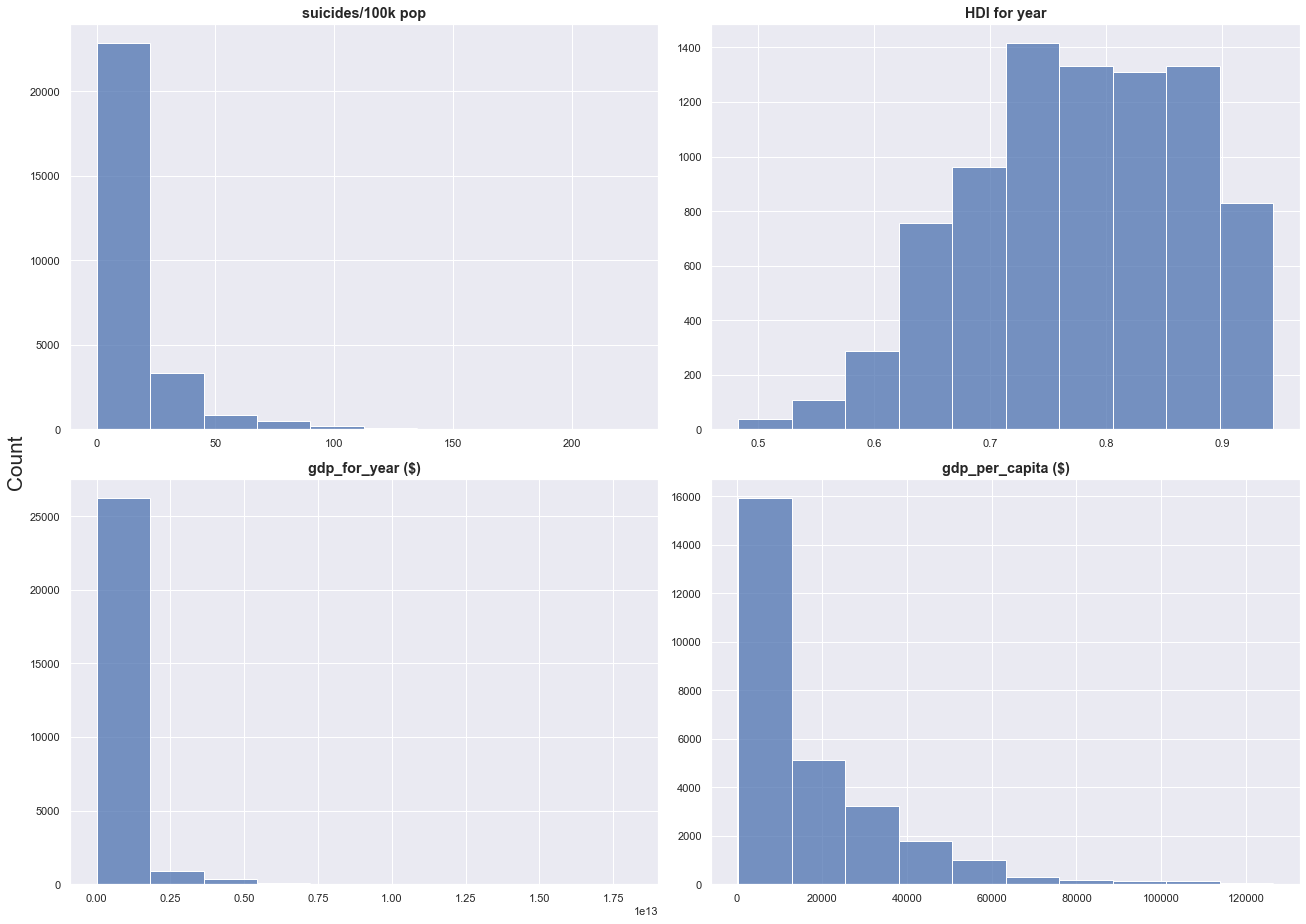

In [17]:
f = plt.figure(figsize = (18,13))

for i in range(4):
  f.add_subplot(2, 2, i+1)
  ax = sns.histplot(df[ContinuousVars[i]], bins = 10)
  ax.set(xlabel = '', ylabel = '')
  plt.title(ContinuousVars[i],weight='bold', size = 'large')

f.text(0, 0.5, "Count", ha = "center", va = "center", rotation = 90, size = 'xx-large',)
plt.tight_layout()
plt.show()

<hr style="border:1px solid lightgrey"> </hr>
QQ-Plots of each Continuous Variable

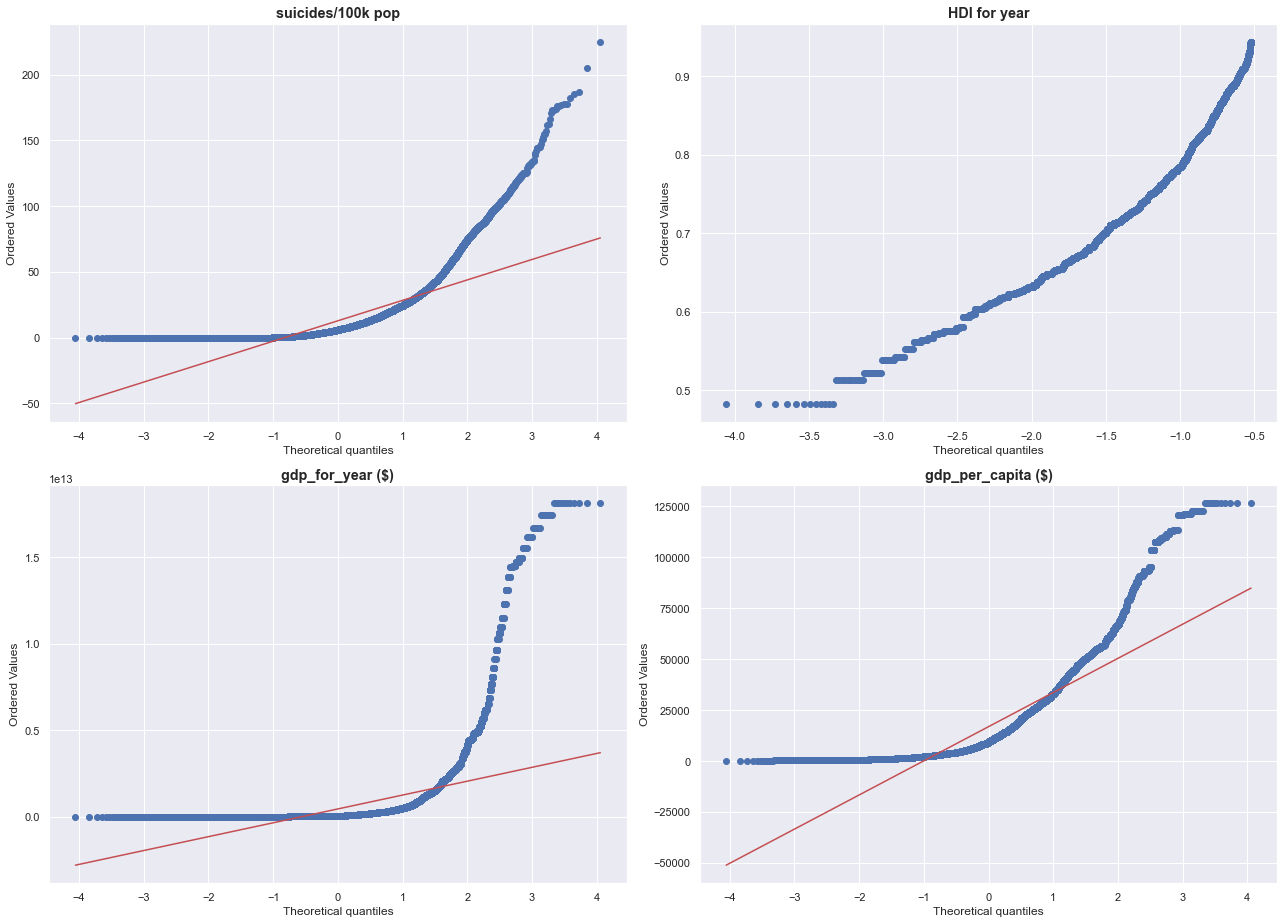

In [18]:
f = plt.figure(figsize = (18,13))

for i in range(4):
  f.add_subplot(2, 2, i+1)
  ax = stats.probplot(df[ContinuousVars[i]], dist = 'norm', plot = pylab)
  plt.title(ContinuousVars[i],weight='bold', size = 'large')

plt.tight_layout()
plt.show()

Extrapolating from the graphs, it can be said that -\
1. The data for **suicides/100k pop** variable is right-skew.
2. The data for **HDI for year** variable is a normal distribution.
3. The data for **gdp for year** variable is right-skew.
4. The data for **gdp per capita** variable is right-skew.

<hr style="border:1px solid lightgrey"> </hr>
Log Normal Graphs for each continuous Variable

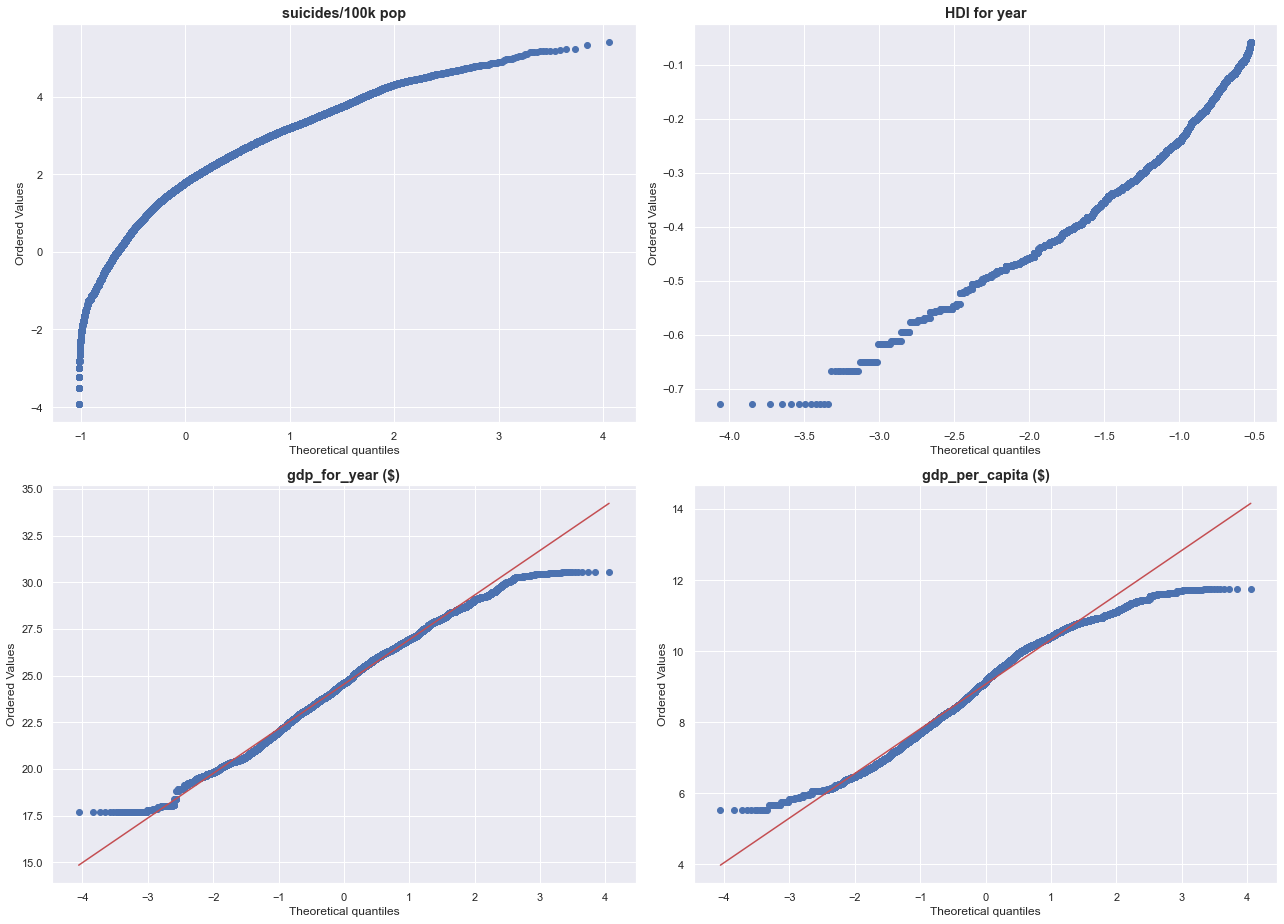

In [19]:
f = plt.figure(figsize = (18,13))

for i in range(4):
    f.add_subplot(2, 2, i+1)
    # ignoring cases where the value log(0) is being calculated
    with np.errstate(divide = 'ignore'):
        res = np.log(df[ContinuousVars[i]])
    # ignoring other invalid cases
    with np.errstate(invalid = 'ignore'):
        ax = stats.probplot(res,dist = 'norm', plot = pylab)
    plt.title(ContinuousVars[i],weight='bold', size = 'large')

plt.tight_layout()
plt.show()

Thus, after extrapolating the graphs, it can be said that **gdp for year** and **gdp per capita** are both log normal distributions.

<hr style="border:1px solid black"> </hr>
<hr style="border:1px solid black"> </hr>

# 1. D &nbsp; <span style="font-variant:small-caps;">Pair-Wise Interaction</span>

Box-and-Whiskers plots of Discrete-Continuous pairs between **Years** and **GDP per Capita** and **Years** and **HDI per year**.

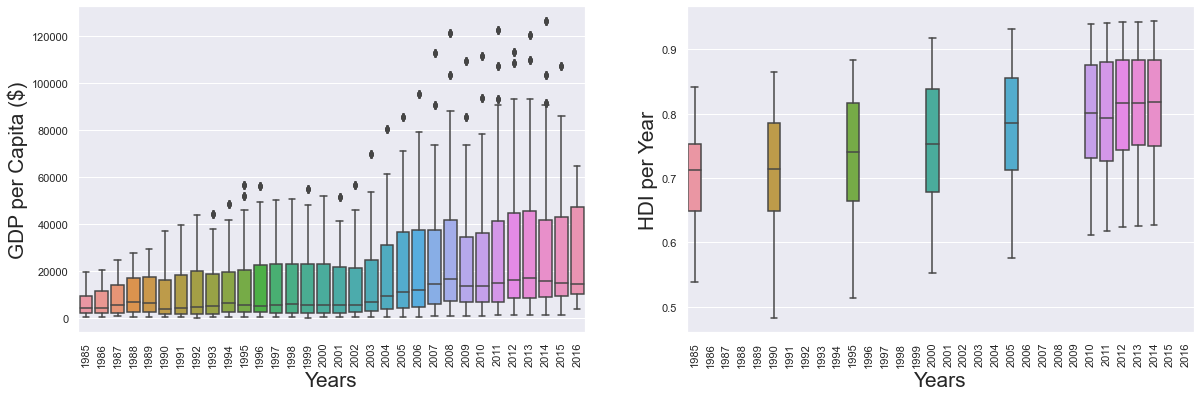

In [20]:
f = plt.figure(figsize = (20,6))
f.add_subplot(1,2,1)
# plot between gdp_per_capita and year
plot = sns.boxplot(x = df[DiscreteVars[0]],y = df[ContinuousVars[3]])
plot.set_xlabel('Years', fontsize = 'xx-large')
plot.set_ylabel('GDP per Capita ($)', fontsize = 'xx-large')
plt.xticks(rotation = 90)

f.add_subplot(1,2,2)
# plot between HDI per year and year
plot = sns.boxplot(x = df[DiscreteVars[0]],y = df[ContinuousVars[1]])
plot.set_xlabel('Years', fontsize = 'xx-large')
plot.set_ylabel('HDI per Year', fontsize = 'xx-large')
plt.xticks(rotation = 90)
plt.show()

<hr style="border:1px solid lightgrey"> </hr>
Heatmap of Correlation between all pairs of Continuous Variables

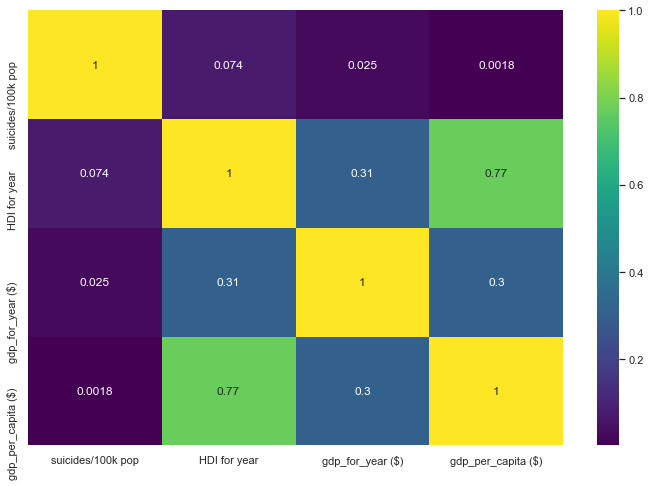

In [21]:
conti_df = df[ContinuousVars]
f = plt.figure(figsize = (12,8))
f.add_subplot(1,1,1)
heatmap = sns.heatmap(conti_df.corr(),cmap = 'viridis', annot = True)
plt.show()

<hr style="border:1px solid lightgrey"> </hr>

Scatter plot between the Continuous Variables **HDI for year** and **GDP for year**.

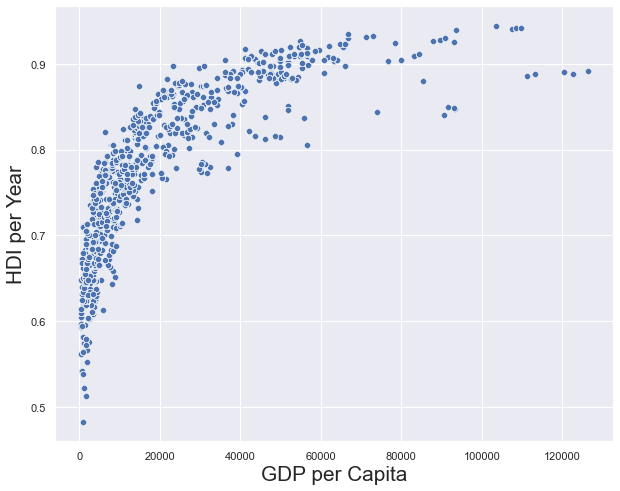

In [22]:
fig = plt.figure(figsize = (10,8))
# scatter plot between HDI per year and GDP per year
fig = sns.scatterplot(x = df[ContinuousVars[3]], y = df[ContinuousVars[1]])
fig.set_xlabel('GDP per Capita', fontsize = 'xx-large')
fig.set_ylabel('HDI per Year', fontsize = 'xx-large')
plt.show()

The insights form this EDA is that **GDP per Capita** and **HDI per Year** are correlated but a simple regression line will lead to a lot of outliers, thus the correlation of these two variables is complex then simple regression.

<hr style="border:1px solid black"> </hr>
<hr style="border:1px solid black"> </hr>


# 2. A &nbsp; <span style="font-variant:small-caps;">Average Yearly Suicides</span>

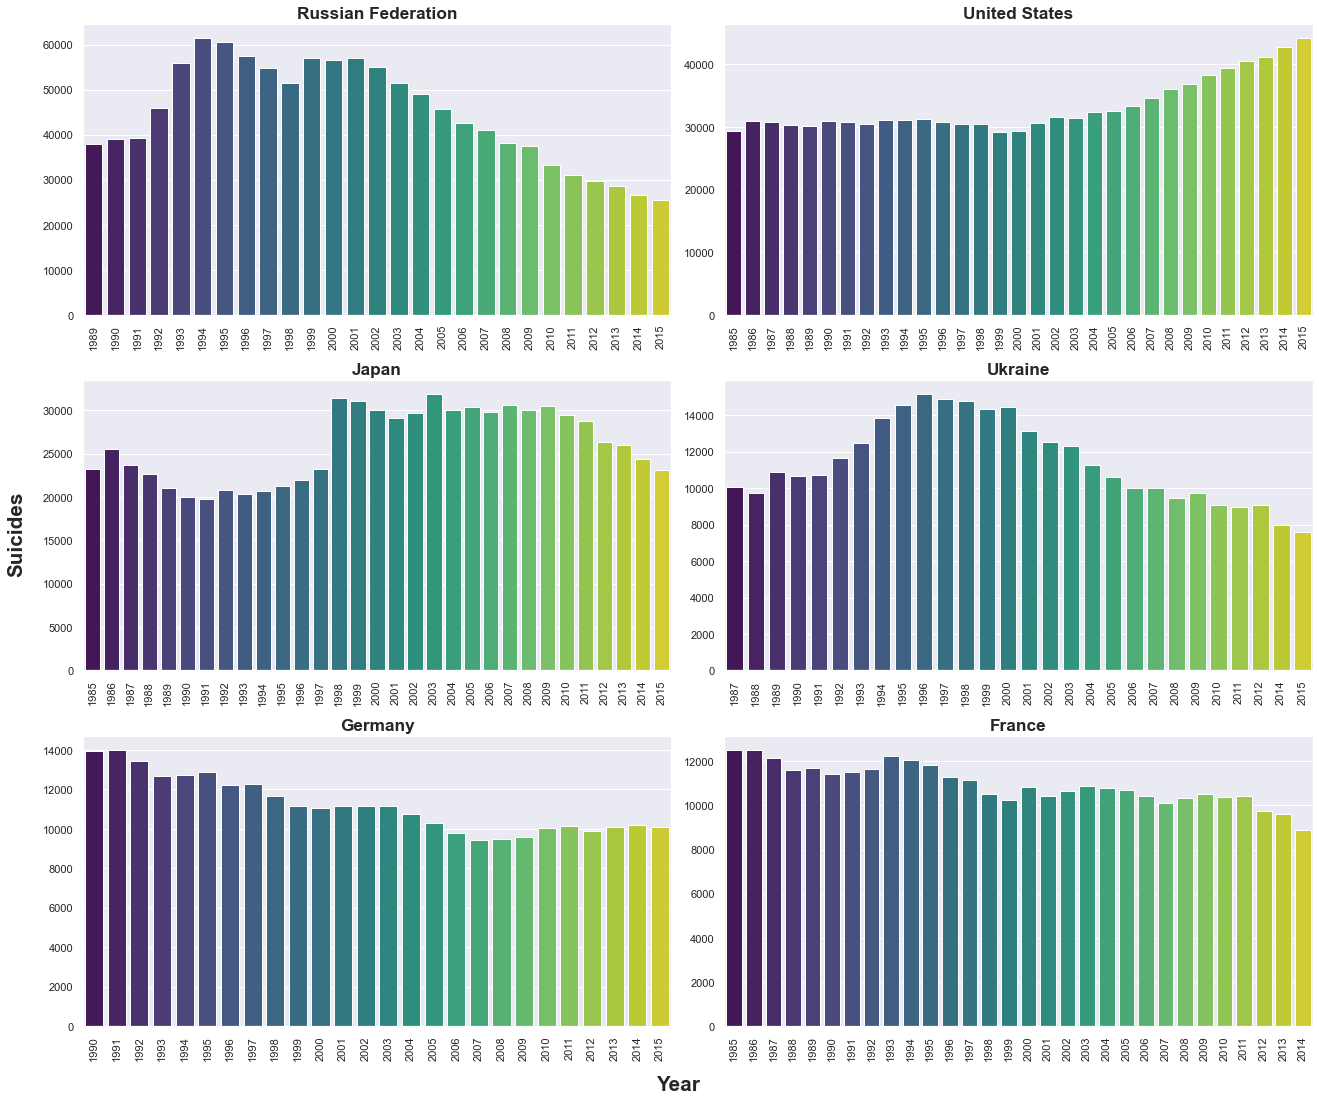

In [23]:
# Adding all the suicides for same years
df_yr_suicides = df.groupby(['country', 'year']).sum()
# Averaging suicides per year
df_avg = df_yr_suicides.groupby(['country']).mean()
# Top 6 countries leading in average yearly suicides
top6countries = df_avg.nlargest(6, 'suicides_no').index.tolist()

f = plt.figure(figsize = (18,15))
for i in range(6):
    f.add_subplot(3,2,1+i)
    #Finding suicides year-wise in the 6 countries
    df_top6 = df_yr_suicides.xs(top6countries[i], level = 'country')['suicides_no']
    ax = sns.barplot(x = df_top6.index, y = df_top6.values, palette = 'viridis')
    ax.set(xlabel='')
    plt.title(top6countries[i],weight='bold', size = 'x-large')
    plt.xticks(rotation=90)

f.text(0.5, -0.01, "Year", ha = "center", va = "center", weight = 'bold',size = 'xx-large')
f.text(-0.01, 0.5, "Suicides", ha = "center", va = "center", weight = 'bold',size = 'xx-large', rotation = 90)
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>


# 2. B &nbsp; <span style="font-variant:small-caps;">Age Group</span>

Removing 'years' from the end of the **age** column

In [24]:
df['age'].replace('years','', regex=True, inplace=True)
# So that the column becomes ordered in the correct order
df['age'].replace('5-14','05-14', regex=True, inplace=True)

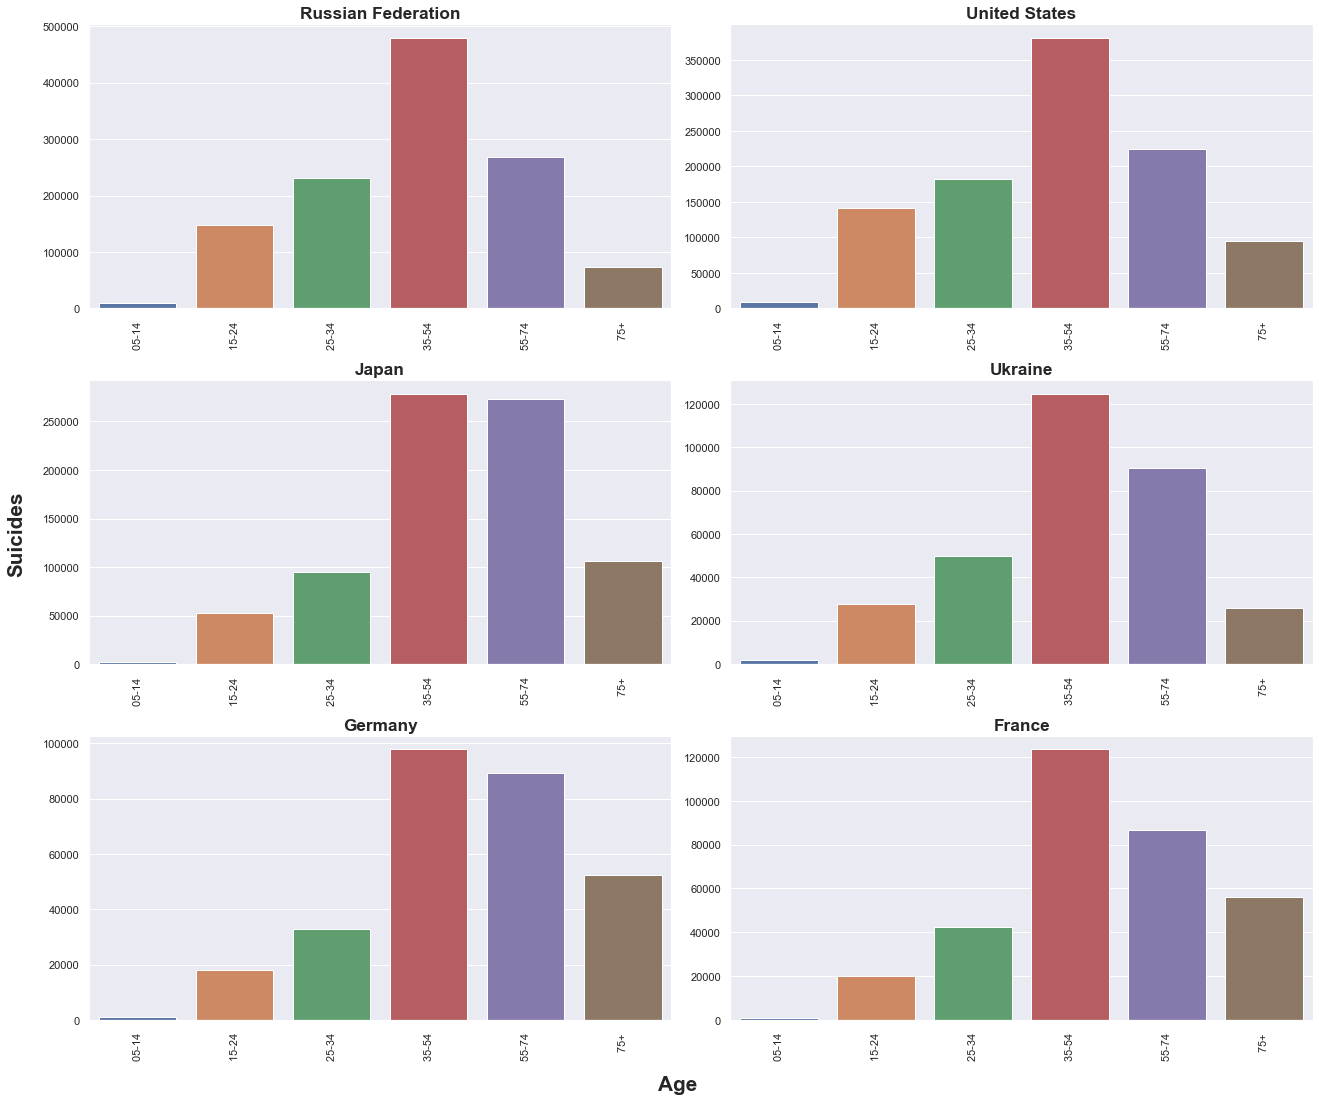

In [25]:
# adding all the suicides by each country w.r.t age group
df_age_suicides = df.groupby(['country', 'age']).sum()

f = plt.figure(figsize = (18,15))
for i in range(6):
    f.add_subplot(3,2,1+i)
    # plotting barplots for top 6 countries with highest avg. yearly suicides
    df_top6 = df_age_suicides.xs(top6countries[i], level = 'country')['suicides_no']
    ax = sns.barplot(x = df_top6.index, y = df_top6.values)
    ax.set(xlabel='')
    plt.title(top6countries[i],weight='bold', size = 'x-large')
    plt.xticks(rotation=90)

f.text(0.5, -0.01, "Age", ha = "center", va = "center", weight = 'bold',size = 'xx-large')
f.text(-0.01, 0.5, "Suicides", ha = "center", va = "center", weight = 'bold',size = 'xx-large', rotation = 90)
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>


# 2. C &nbsp; <span style="font-variant:small-caps;">Difference Between Male and Female Suicides</span>

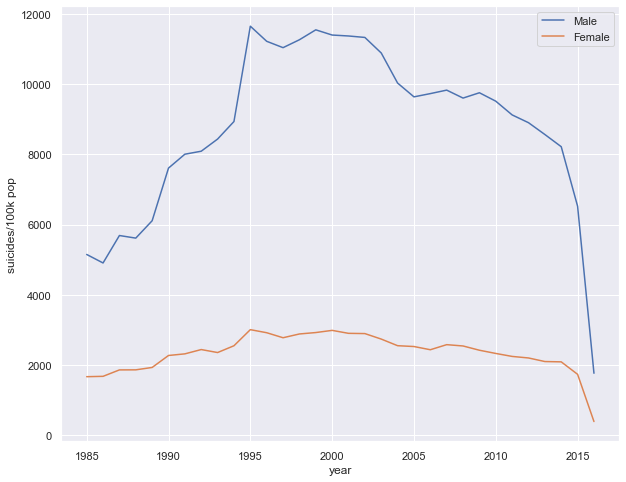

In [26]:
# Grouping the data w.r.t to sex for both male and female
df_male = df.loc[df['sex'] == 'male']
df_female = df.loc[df['sex'] == 'female']
# Adding all the suicides for all the age-groups
df_male_yr = df_male.groupby(['year']).sum()
df_female_yr = df_female.groupby(['year']).sum()

f = plt.figure(figsize = (10,8))
# We use suicides/100k pop here 
f = sns.lineplot(x = df_male_yr.index, y = df_male_yr['suicides/100k pop'], label = 'Male')
f = sns.lineplot(x = df_female_yr.index, y = df_female_yr['suicides/100k pop'], label = 'Female')

plt.show()

<hr style="border:1px solid black"> </hr>


# 2. D &nbsp; <span style="font-variant:small-caps;">Worst Year For Each Generation in US</span>

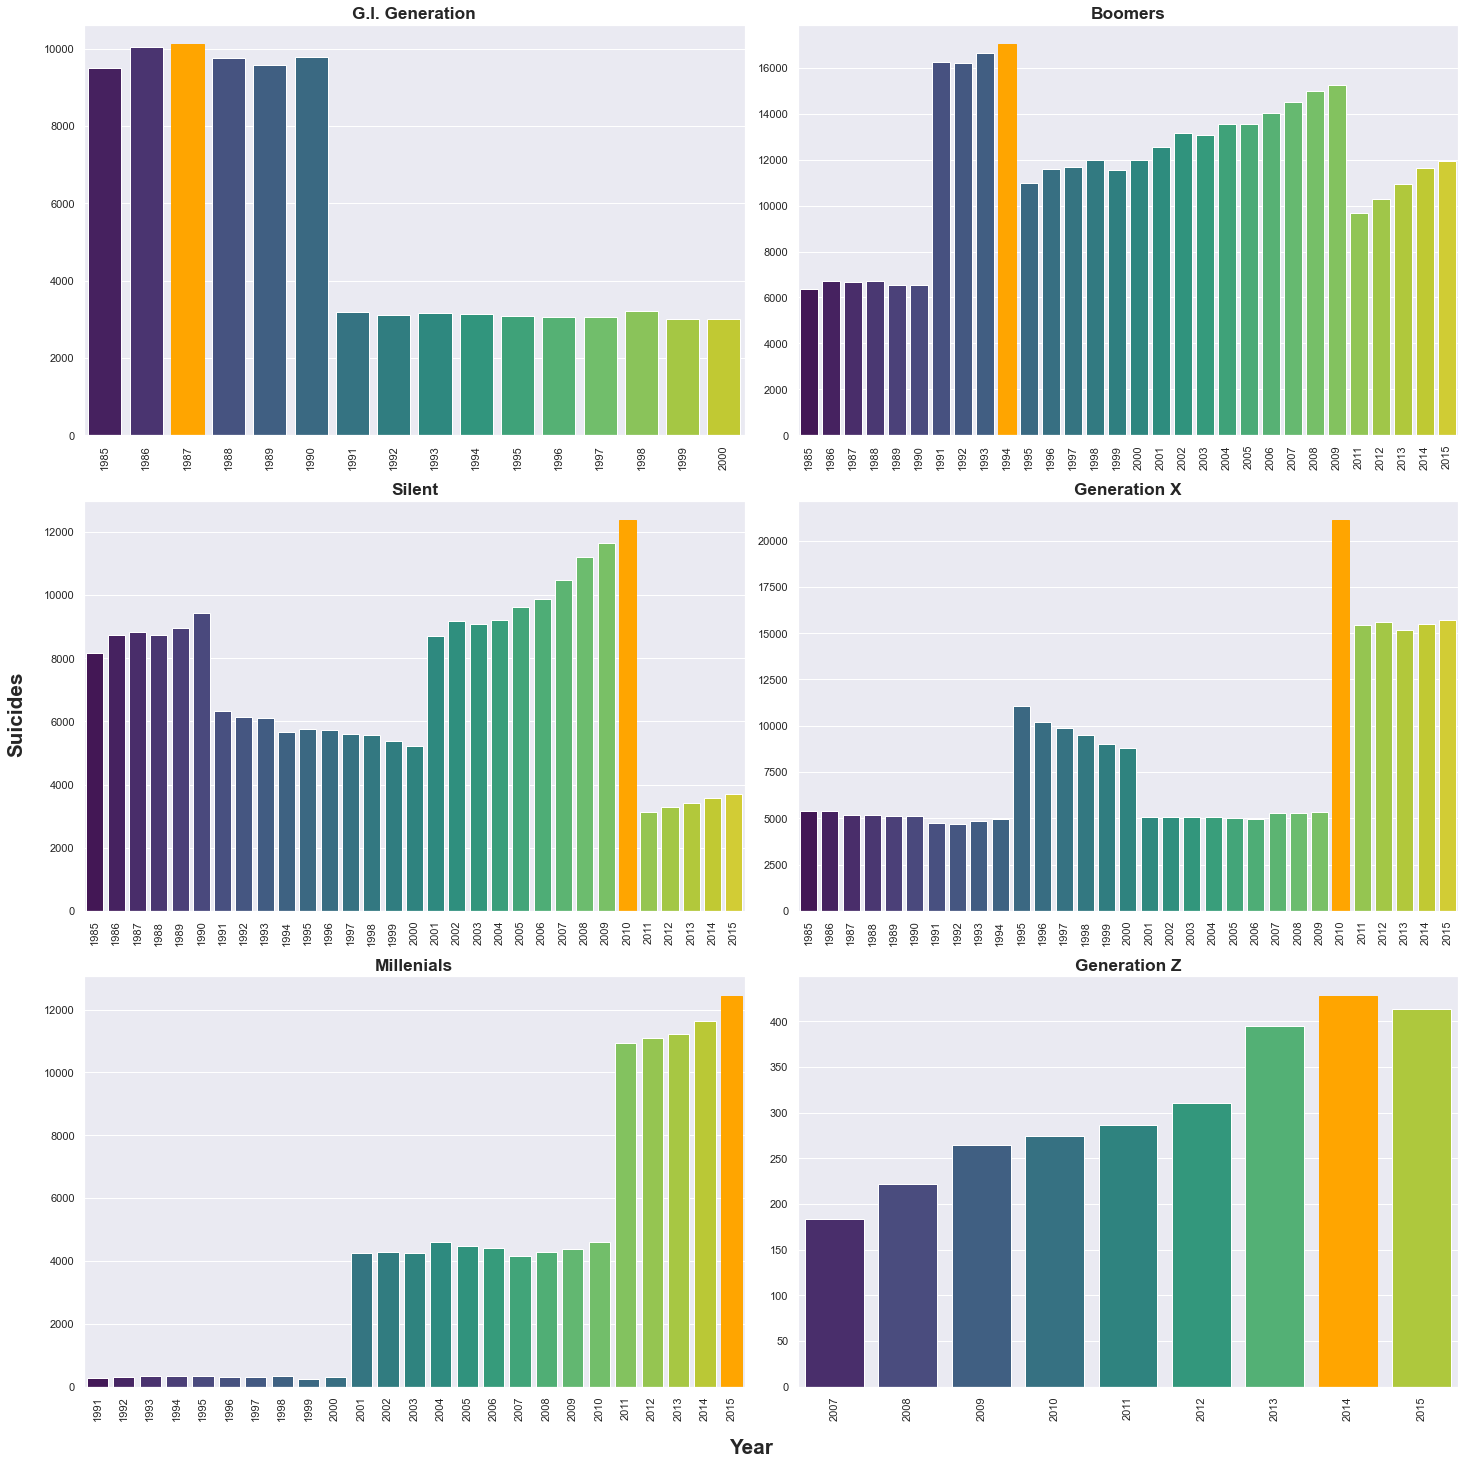

In [27]:
# Setting the country to US
df_US = df.loc[df['country'] == 'United States']
# choosing only the columns needed
df_US = df_US[['generation', 'year', 'suicides_no']]
# Adding suicides for each year across different sex
df_US_gen = df_US.groupby(['generation', 'year']).sum()

generations = list(df_US['generation'].unique())

f = plt.figure(figsize = (20,20))
for i in range(6):
    f.add_subplot(3,2,1+i)
    df_temp = df_US_gen.xs(generations[i], level = 'generation')['suicides_no']
    ax = sns.barplot(x = df_temp.index, y = df_temp.values, palette = 'viridis')
    # Setting the most death bar to orange color
    for bar in ax.patches:
        if bar.get_height() == max(df_temp):
            bar.set_color('orange')
    
    ax.set(xlabel='')
    plt.title(generations[i], weight = 'bold', size = 'x-large')
    plt.xticks(rotation=90)

f.text(0.5, -0.01, "Year", ha = "center", va = "center", weight = 'bold',size = 'xx-large')
f.text(-0.01, 0.5, "Suicides", ha = "center", va = "center", weight = 'bold',size = 'xx-large', rotation = 90)
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>


# 2. E &nbsp; <span style="font-variant:small-caps;">Bihistogram for Male and Female</span>

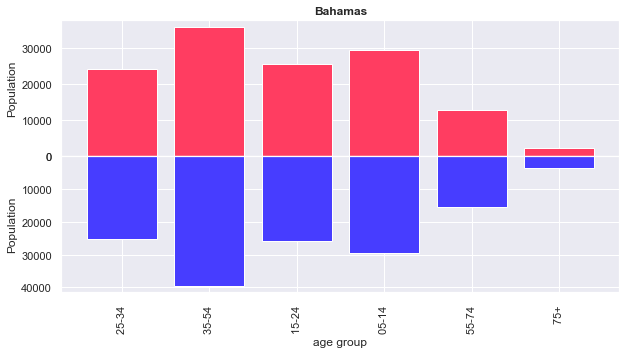

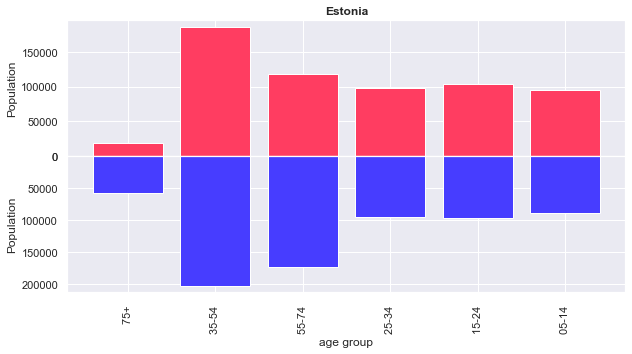

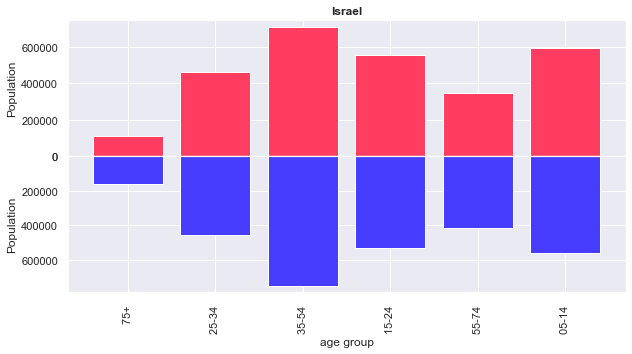

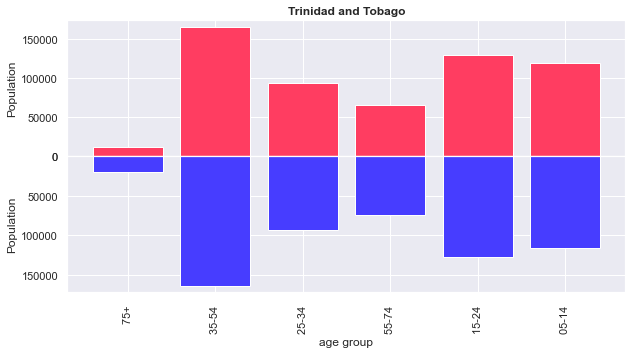

In [28]:
# Setting the year to be 2000
df2000 = df.loc[df['year'] == 2000]
# Choosing 4 random countries of choice
countries = ['Bahamas', 'Estonia', 'Israel', 'Trinidad and Tobago']\

ages = list(df2000['age'].unique())
ages.sort()

for i,country in enumerate(countries):

    df_country = df2000.loc[df2000['country'] == country]

    df_male = df_country.loc[df_country['sex'] == 'male'][['age', 'population']]
    df_female = df_country.loc[df_country['sex'] == 'female'][['age', 'population']]
    
    # Merging the 2 dfs to plot a bihistogram
    df_merge = pd.merge(df_male, df_female, on='age')
    df_male.reset_index(drop=True,inplace=True)
    df_female.reset_index(drop=True,inplace=True)
    df_merge = df_merge[['age','population_x','population_y']]

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
    # Plotting the bihistogram with female plot inverted
    # Red denotes male and blue denotes female
    for ax,column,color,invert in zip(axes.ravel(),['population_x','population_y'],['#ff3d61','#473dff'],[False,True]):
        ax.bar(df_merge['age'],df_merge[column],  color=color)
        plt.xticks(rotation=90)
        ax.set(xlabel='age group',ylabel='Population')
        if invert:
            ax.invert_yaxis()
        else :
            ax.set_title(country, fontweight='bold') 
    # Removing empty space between the two curves to join them 
    plt.subplots_adjust(hspace=0)  
    plt.show()    

<hr style="border:1px solid black"> </hr>


# 2. F &nbsp; <span style="font-variant:small-caps;">Bubble Plot</span>

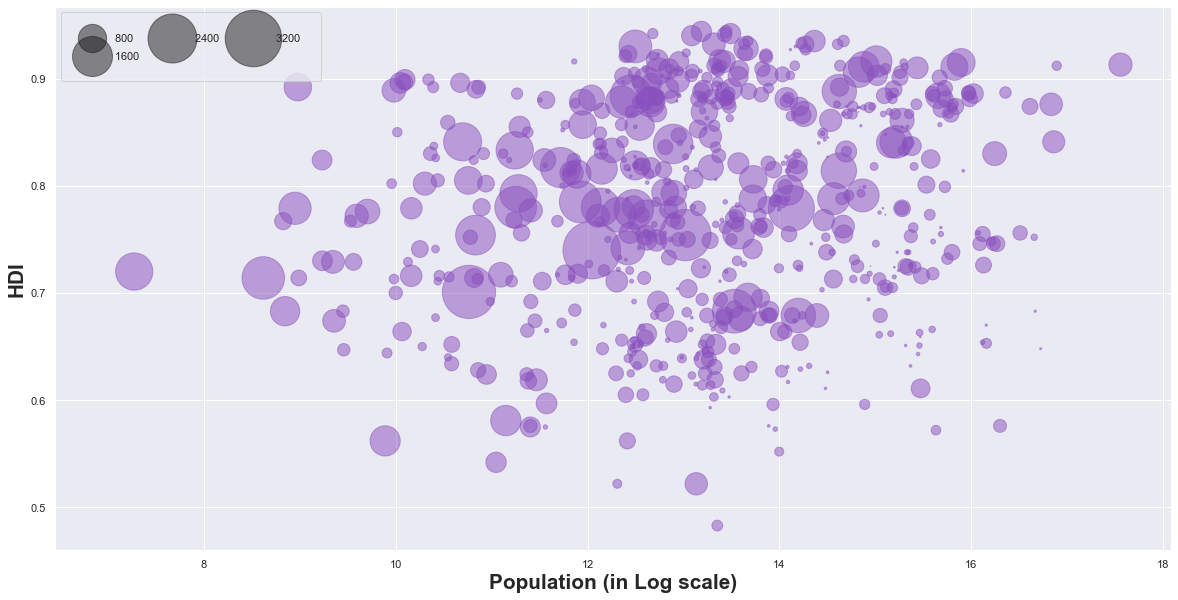

In [29]:
f = plt.figure(figsize = (20,10))
# Removing NaN values form the HDI for year 
df = df.dropna(subset = ['HDI for year'])
# Randomly sorting the indices
df = df.reindex(np.random.permutation(df.index))
# Choosing 750 indices from the randomly sorted to get an approximate sample of data
df_sample = df.iloc[:750,:]

# Defining the x, y, z axes for the bubble plot
x = np.log(df_sample['population'])
y = df_sample['HDI for year']
z = df_sample['suicides/100k pop']

fig = plt.scatter(x,y,z*20, c = '#8950be', alpha = 0.5)

plt.legend(*fig.legend_elements("sizes", num=5),ncol=3, frameon=True, handlelength=2, borderpad = 1.8,handletextpad=1)

plt.xlabel('Population (in Log scale)', weight = 'bold', size = 'xx-large')
plt.ylabel('HDI', weight = 'bold', size = 'xx-large')
plt.show()

Due to the large number of samples, I took **750** randomly for better visualization. Also, due to the large spread of **Population**, I had to take **Population** in logarithm scale.